# 📚 时序差分（Temporal Difference, TD）学习

## 🎯 本节学习目标
- 理解时序差分方法的核心思想：**自举**（bootstrapping）
- 掌握TD(0)的更新公式及其物理意义
- 对比TD与蒙特卡洛（MC）方法的本质区别
- 通过代码实验体会TD的在线学习特性

## 💡 核心直觉：从"预测天气"理解TD学习

### 问题场景
想象你在预测**7天后**的天气温度。你有两种策略：

**策略A（蒙特卡洛方法）**：
- 等待7天全部过完
- 记录实际温度：20°C
- 用这个**真实值**更新你7天前的预测

**策略B（时序差分方法）**：
- **第1天晚上**：看到实际温度是18°C，你原本预测明天（第2天）是22°C
- 立即调整：既然第1天比预期冷，那7天后可能也会冷一些
- **第2天晚上**：继续用同样的方式调整...
- 每天都**边走边学**，用"明天的预测"来改进"今天的预测"

---

### TD学习的本质
**核心思想**：不等游戏结束，每走一步就用**下一步的估计值**来更新**当前的估计值**。

这就是你刚才说的：
> "借助下一时刻估计的状态价值优化前一时刻的状态价值"

用公式表示：
$$
V(s_t) \leftarrow V(s_t) + \alpha [\underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{目标：下一步的估计}} - \underbrace{V(s_t)}_{\text{当前估计}}]
$$

其中：
- $r_{t+1}$：走一步后真实获得的奖励（**真实的**）
- $V(s_{t+1})$：下一个状态的价值（**估计的**）
- $V(s_t)$：当前状态的价值（**要更新的**）

---

### 与蒙特卡洛的对比

| 特性 | 蒙特卡洛（MC） | 时序差分（TD） |
|------|--------------|---------------|
| **更新时机** | 回合结束后 | 每走一步 |
| **使用的目标** | $G_t =$ 真实总回报 | $r_{t+1} + \gamma V(s_{t+1})$ |
| **自举** | ❌ 不使用估计 | ✅ 用估计更新估计 |
| **适用环境** | 必须有终止 | 可以无终止 |
| **学习速度** | 慢（要等到结束） | 快（在线学习） |

## 🧮 数学推导：TD误差（TD Error）

### 回顾更新公式
$$
V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]
$$

让我们给公式的各个部分命名：

---

### 第1步：定义TD目标
$$
\text{TD目标} = r_{t+1} + \gamma V(s_{t+1})
$$

> 💡 **为什么叫"目标"？**  
> 因为这是我们希望 $V(s_t)$ 逼近的值。就像预测天气的例子中，"明天的实际温度 + 明天的预测"是我们用来修正"今天预测"的目标。

---

### 第2步：定义TD误差
$$
\delta_t = \underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{TD目标}} - \underbrace{V(s_t)}_{\text{当前估计}}
$$

**$\delta_t$ 的物理意义**：
- 如果 $\delta_t > 0$：说明我们**低估**了 $s_t$ 的价值 → 应该增加 $V(s_t)$
- 如果 $\delta_t < 0$：说明我们**高估**了 $s_t$ 的价值 → 应该减少 $V(s_t)$
- 如果 $\delta_t = 0$：估计刚好准确（理想情况）

---

### 第3步：更新公式的最终形式
将TD误差代入更新公式：
$$
V(s_t) \leftarrow V(s_t) + \alpha \cdot \delta_t
$$

这就是**TD(0)算法**的核心！

---

### 第4步：与增量式蒙特卡洛对比

**蒙特卡洛**：
$$
V(s_t) \leftarrow V(s_t) + \alpha (\underbrace{G_t}_{\text{真实回报}} - V(s_t))
$$

**时序差分**：
$$
V(s_t) \leftarrow V(s_t) + \alpha (\underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{估计回报}} - V(s_t))
$$

**关键区别**：MC用 $G_t$（必须等到回合结束才知道），TD用 $r_{t+1} + \gamma V(s_{t+1})$（只需走一步就能计算）。

---

### 🔑 核心洞察
TD误差 $\delta_t$ 衡量的是：
- **我们的预测**（$V(s_t)$）
- 与**走一步后的新预测**（$r_{t+1} + \gamma V(s_{t+1})$）
- 之间的**差距**

这种"用新预测修正旧预测"的方式，就是**自举（Bootstrapping）**的本质！

## 🔍 关键疑问解答：$s_{t+1}$ 和 $V(s_{t+1})$ 到底是什么？

### 问题重述
在TD更新公式中：
$$
V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]
$$

- $s_{t+1}$ 具体指什么？
- $V(s_{t+1})$ 是如何计算的？
- 实际应用中如何体现？

---

### 答案：一个具体例子（4x4网格世界）

假设智能体在一个4x4的网格中移动，目标是到达右下角：

```
状态编号：
[ 0][ 1][ 2][ 3]
[ 4][ 5][ 6][ 7]
[ 8][ 9][10][11]
[12][13][14][15]  ← 15是目标
```

**场景**：智能体当前在状态5，选择向右移动。

---

### 第1步：发生了什么？

```python
# 智能体执行动作前
当前状态: s_t = 5
动作: a_t = "向右"
当前价值估计: V(5) = 2.3  # 这是之前估计的值

# 智能体执行动作后
下一个状态: s_{t+1} = 6  # 从5向右移动到6
获得奖励: r_{t+1} = -1    # 每走一步惩罚-1
下一个状态的价值估计: V(6) = 3.5  # 这也是之前估计的值
```

**关键点**：
- $s_{t+1} = 6$：这是智能体**实际到达**的新状态（由环境决定）
- $V(s_{t+1}) = V(6) = 3.5$：这是我们**之前对状态6的估计值**（从价值表中查询）

---

### 第2步：$V(s_{t+1})$ 从哪里来？

**核心理解**：$V(s_{t+1})$ 不是"计算"出来的，而是从**价值表**中**查询**出来的！

```python
# 我们维护一个价值表（通常用数组或字典）
V = {
    0: 0.0,
    1: 0.5,
    2: 1.2,
    ...
    5: 2.3,   # ← 这是 V(s_t)
    6: 3.5,   # ← 这是 V(s_{t+1})
    ...
    15: 0.0   # 目标状态
}
```

**流程**：
1. 智能体在 $s_t = 5$，查表得到 $V(5) = 2.3$
2. 执行动作后到达 $s_{t+1} = 6$，查表得到 $V(6) = 3.5$
3. 获得奖励 $r_{t+1} = -1$
4. 用这三个值计算TD误差并更新 $V(5)$

---

### 第3步：完整的更新过程

```python
# 参数设置
alpha = 0.1      # 学习率
gamma = 0.9      # 折扣因子

# TD目标
TD_target = r_{t+1} + gamma * V(s_{t+1})
          = -1 + 0.9 * 3.5
          = -1 + 3.15
          = 2.15

# TD误差
delta = TD_target - V(s_t)
      = 2.15 - 2.3
      = -0.15

# 更新 V(s_t)
V(5) = V(5) + alpha * delta
     = 2.3 + 0.1 * (-0.15)
     = 2.3 - 0.015
     = 2.285
```

**结果**：$V(5)$ 从 2.3 降低到 2.285（因为TD目标2.15比当前估计2.3小）

---

### 🔑 核心要点总结

1. **$s_{t+1}$ 是什么？**
   - 执行动作 $a_t$ 后，环境返回的下一个状态
   - 由环境的状态转移决定（不是我们控制的）

2. **$V(s_{t+1})$ 从哪来？**
   - 从价值表中**查询**得到
   - 这是我们**之前对 $s_{t+1}$ 的估计**（可能不准确）

3. **为什么叫"自举"？**
   - 我们用一个**可能不准确的估计** $V(s_{t+1})$
   - 去更新另一个**估计** $V(s_t)$
   - 就像"提着自己的鞋带把自己拔起来"（bootstrapping的字面意思）

4. **价值表如何初始化？**
   - 通常初始化为全0（或随机小值）
   - 通过不断更新，逐渐逼近真实价值

---

### 📊 可视化理解

```
时刻 t:              时刻 t+1:
  
  状态5              状态6
  V(5)=2.3          V(6)=3.5
    │                 ▲
    │  执行动作"向右"  │
    │  获得奖励 r=-1  │
    └─────────────────┘
    
更新: V(5) ← V(5) + α[r + γ·V(6) - V(5)]
           = 2.3 + 0.1[-1 + 0.9×3.5 - 2.3]
           = 2.285
```

## 💻 代码实验：GridWorld环境的TD(0)学习

### 环境设计：4x4网格世界

```
网格布局（状态编号）：
┌────┬────┬────┬────┐
│ 0  │ 1  │ 2  │ 3  │
├────┼────┼────┼────┤
│ 4  │ 5  │ 6  │ 7  │
├────┼────┼────┼────┤
│ 8  │ 9  │ 10 │ 11 │
├────┼────┼────┼────┤
│ 12 │ 13 │ 14 │ 15 │ ← 目标状态
└────┴────┴────┴────┘
```

**游戏规则**：
- 智能体从状态0开始
- 目标：到达状态15（右下角）
- 动作：上、下、左、右（碰到边界就停在原地）
- 奖励：
  - 到达目标（15）：+1
  - 其他所有情况：0
- 策略：**随机策略**（每个方向概率0.25）

---

### 🤔 预测问题

在运行代码前，思考：

1. **哪个状态价值最高？**
   - 提示：离目标越近，价值应该越高

2. **状态0的价值大概是多少？**
   - 提示：从0到15最短需要6步（向右3步+向下3步）
   - 考虑 $\gamma = 0.9$ 和随机策略

3. **TD学习需要多少个回合才能收敛？**
   - 比简单链式环境多还是少？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 第1部分：定义GridWorld环境
# ============================================

class GridWorld:
    """
    4x4网格世界
    状态编号：0-15，目标是状态15
    """
    def __init__(self):
        self.n_states = 16  # 4x4网格
        self.grid_size = 4
        self.goal_state = 15  # 右下角
        
        # 定义4个动作：上、下、左、右
        self.actions = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.actions)
        
    def reset(self):
        """重置到起始状态0"""
        self.current_state = 0
        return self.current_state
    
    def state_to_position(self, state):
        """将状态编号转换为(行, 列)坐标"""
        row = state // self.grid_size
        col = state % self.grid_size
        return row, col
    
    def position_to_state(self, row, col):
        """将(行, 列)坐标转换为状态编号"""
        return row * self.grid_size + col
    
    def step(self, action):
        """
        执行动作，返回(下一个状态, 奖励, 是否结束)
        
        参数：
            action: 'up', 'down', 'left', 'right'
        """
        # 获取当前位置
        row, col = self.state_to_position(self.current_state)
        
        # 根据动作更新位置（边界检查）
        if action == 'up':
            row = max(0, row - 1)  # 不能超出上边界
        elif action == 'down':
            row = min(self.grid_size - 1, row + 1)  # 不能超出下边界
        elif action == 'left':
            col = max(0, col - 1)  # 不能超出左边界
        elif action == 'right':
            col = min(self.grid_size - 1, col + 1)  # 不能超出右边界
        
        # 计算下一个状态
        next_state = self.position_to_state(row, col)
        
        # 计算奖励
        if next_state == self.goal_state:
            reward = 1  # 到达目标获得奖励+1
            done = True
        else:
            reward = 0  # 其他情况奖励为0
            done = False
        
        self.current_state = next_state
        return next_state, reward, done


# ============================================
# 第2部分：TD(0)算法实现
# ============================================

def td_prediction_gridworld(env, alpha=0.1, gamma=0.9, episodes=1000):
    """
    使用TD(0)学习GridWorld的状态价值函数
    采用随机策略（每个动作概率0.25）
    
    参数：
        env: GridWorld环境
        alpha: 学习率
        gamma: 折扣因子
        episodes: 训练回合数
    
    返回：
        V: 学习到的价值函数
        history: 价值函数的历史记录
    """
    # 初始化价值表（目标状态价值为0，其他状态初始化为0）
    V = np.zeros(env.n_states)
    
    # 记录学习历史（每100个回合记录一次）
    history = []
    
    for episode in range(episodes):
        # 重置环境
        state = env.reset()
        done = False
        
        # 单个回合的循环
        while not done:
            # 随机选择一个动作（随机策略）
            action = np.random.choice(env.actions)
            
            # 执行动作
            next_state, reward, done = env.step(action)
            
            # TD(0)更新公式
            # V(s) ← V(s) + α[r + γV(s') - V(s)]
            
            if done:
                # 如果到达终止状态，V(s') = 0
                td_target = reward + gamma * 0
            else:
                # 从价值表中查询V(s')
                td_target = reward + gamma * V[next_state]
            
            # 计算TD误差
            td_error = td_target - V[state]
            
            # 更新价值函数
            V[state] = V[state] + alpha * td_error
            
            # 移动到下一个状态
            state = next_state
        
        # 每100个回合记录一次
        if episode % 100 == 0:
            history.append(V.copy())
    
    return V, history


# ============================================
# 第3部分：运行实验
# ============================================

# 创建环境
env = GridWorld()

print("🔄 开始TD(0)学习...")
print(f"环境：{env.grid_size}x{env.grid_size} GridWorld")
print(f"目标：到达状态{env.goal_state}")
print(f"策略：随机策略（每个方向概率0.25）")
print()

# 运行TD学习
V_learned, history = td_prediction_gridworld(
    env, 
    alpha=0.2,      # 学习率
    gamma=0.9,      # 折扣因子
    episodes=100000   # 训练100000个回合
)

print("✅ 学习完成！")
print()

# 以网格形式显示学习到的价值函数
print("学习到的价值函数（网格形式）：")
V_grid = V_learned.reshape(4, 4)
print(V_grid)
print()

# 显示每个状态的具体价值
print("详细价值（保留4位小数）：")
for row in range(4):
    for col in range(4):
        state = row * 4 + col
        print(f"V({state:2d})={V_learned[state]:.4f}", end="  ")
    print()  # 换行

🔄 开始TD(0)学习...
环境：4x4 GridWorld
目标：到达状态15
策略：随机策略（每个方向概率0.25）

✅ 学习完成！

学习到的价值函数（网格形式）：
[[0.0581042  0.08788791 0.10394837 0.19136141]
 [0.08591376 0.14427541 0.23421915 0.49167711]
 [0.10254859 0.15017535 0.33379966 0.67060917]
 [0.15253037 0.25672398 0.47689331 0.        ]]

详细价值（保留4位小数）：
V( 0)=0.0581  V( 1)=0.0879  V( 2)=0.1039  V( 3)=0.1914  
V( 4)=0.0859  V( 5)=0.1443  V( 6)=0.2342  V( 7)=0.4917  
V( 8)=0.1025  V( 9)=0.1502  V(10)=0.3338  V(11)=0.6706  
V(12)=0.1525  V(13)=0.2567  V(14)=0.4769  V(15)=0.0000  


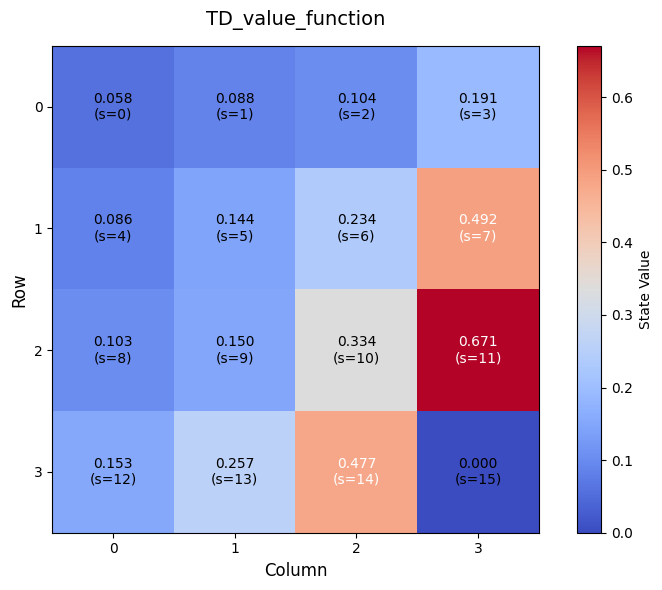

In [7]:
# ============================================
# 第4部分：可视化价值函数（热力图）
# ============================================

def plot_value_function(V, title="状态价值函数"):
    """用热力图可视化价值函数"""
    V_grid = V.reshape(4, 4)
    
    plt.figure(figsize=(8, 6))
    im = plt.imshow(V_grid, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='State Value')
    plt.title(title, fontsize=14, pad=15)
    
    # 在每个格子中标注数值
    for i in range(4):
        for j in range(4):
            state = i * 4 + j
            text_color = 'white' if V_grid[i, j] > V_grid.max() / 2 else 'black'
            plt.text(j, i, f'{V_grid[i, j]:.3f}\n(s={state})',
                    ha='center', va='center', color=text_color, fontsize=10)
    
    plt.xlabel('Column', fontsize=12)
    plt.ylabel('Row', fontsize=12)
    plt.xticks(range(4))
    plt.yticks(range(4))
    plt.tight_layout()
    plt.show()

# 绘制最终学习到的价值函数
plot_value_function(V_learned, "TD_value_function")

## 📊 结果解读

运行上面的代码后，观察热力图，你会发现：

### 🔑 关键观察

1. **价值梯度**：
   - 右下角（状态15，目标）附近的价值最高
   - 从左上角（状态0）到右下角，价值逐渐增加
   - 这符合直觉：离目标越近，价值越高

2. **对称性**：
   - 距离目标相同的状态，价值相近
   - 例如：状态11和状态14距离目标都是1步，它们的价值应该接近

3. **初步观察**：
   - 状态14（目标左边）的价值较高（接近目标）
   - 状态0（左上角）的价值很小（距离目标远）
   - 但具体数值是否准确，需要用动态规划验证

---

### 💡 TD学习的工作原理（价值传播）

**学习过程示意**：

**第1次到达状态14**：
```python
# 假设智能体在状态14，选择向右
state = 14
action = 'right'
next_state = 15  # 到达目标！
reward = 1
done = True

# 计算TD目标
td_target = reward + gamma * 0  # 终止状态价值为0
          = 1 + 0.9 * 0 = 1.0

# TD误差（假设V(14)初始为0）
td_error = 1.0 - 0 = 1.0

# 更新V(14)
V(14) = 0 + 0.1 * 1.0 = 0.1  # α=0.1
```

**多次访问后**：
- $V(14)$ 会逐渐增加
- 但不会到达1.0（因为不是每次都能直接向右成功）
- 最终收敛到真实价值（需要动态规划计算）

---

### 🔄 价值如何"传播"

1. **第1阶段**：离目标1步的状态（11, 14）首先获得价值
2. **第2阶段**：离目标2步的状态（7, 10, 13）从邻居"学到"价值
3. **第3阶段**：价值逐步向外传播，像波纹一样扩散
4. **最终**：所有状态都学到正确的价值

这就是TD学习的 **信用分配（Credit Assignment）** 机制！

---

### ⚠️ 重要提示

- TD学习是采样方法，需要足够的探索
- 如果某些状态访问次数少，价值更新就慢
- 为了验证学习效果，我们接下来会：
  1. 用动态规划计算真实价值（标准答案）
  2. 对比TD学习结果
  3. 分析误差来源

🔄 使用动态规划计算真实价值（标准答案）...

✅ 动态规划在第 57 次迭代后收敛

TD学习 vs 动态规划（真实价值）对比：

状态     TD学习            真实价值(DP)        绝对误差        
----------------------------------------------------------------------
0      0.058104        0.071008        0.012904      ⚠
1      0.087888        0.086790        0.001098      ✓
2      0.103948        0.113892        0.009944      ✓
3      0.191361        0.138867        0.052495      ⚠
4      0.085914        0.086790        0.000876      ✓
5      0.144275        0.114043        0.030232      ⚠
6      0.234219        0.166641        0.067578      ⚠
7      0.491677        0.225561        0.266116      ⚠
8      0.102549        0.113892        0.011344      ⚠
9      0.150175        0.166641        0.016466      ⚠
10     0.333800        0.287130        0.046669      ⚠
11     0.670609        0.471427        0.199183      ⚠
12     0.152530        0.138867        0.013664      ⚠
13     0.256724        0.225561        0.031163      ⚠
14     0.476893        0.471427        

/tmp/ipykernel_1412387/2091094311.py:141: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412387/2091094311.py:141: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


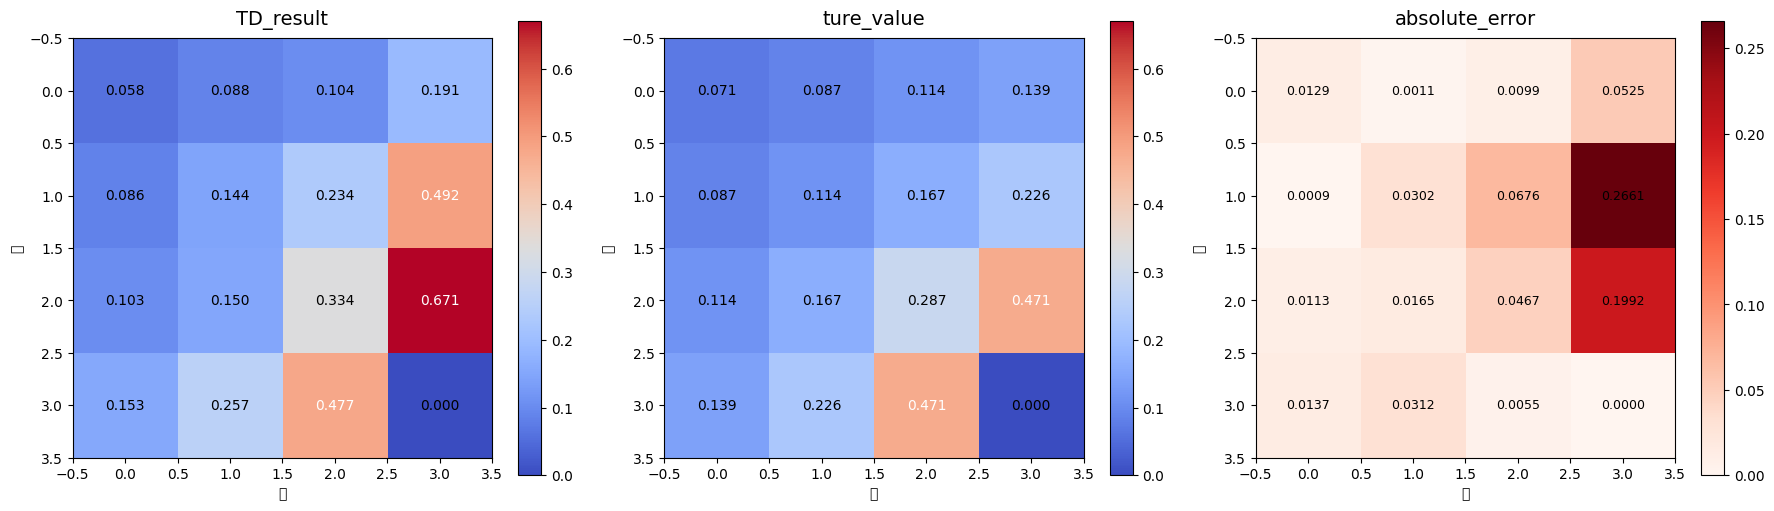

In [6]:
# ============================================
# 第5部分：用动态规划计算真实价值（作为对比）
# ============================================

def compute_true_values_dp(env, gamma=0.9, theta=1e-6):
    """
    使用动态规划（迭代策略评估）计算随机策略的真实价值函数
    
    这是"标准答案"，用来验证TD学习是否正确
    
    原理：
        不断迭代应用贝尔曼方程，直到价值函数收敛
        V(s) = Σ_a π(a|s) Σ_{s',r} p(s',r|s,a)[r + γV(s')]
    
    参数：
        env: GridWorld环境
        gamma: 折扣因子
        theta: 收敛阈值
    """
    V = np.zeros(env.n_states)
    
    iteration = 0
    while True:
        delta = 0  # 记录最大变化量
        
        # 遍历每个状态
        for state in range(env.n_states):
            if state == env.goal_state:
                continue  # 跳过终止状态
            
            v = V[state]  # 保存旧值
            
            # 计算新值：对所有动作求期望（随机策略）
            new_value = 0
            for action in env.actions:
                # 模拟执行动作
                env.current_state = state
                next_state, reward, done = env.step(action)
                
                # 计算这个动作的价值贡献
                if done:
                    action_value = reward + gamma * 0
                else:
                    action_value = reward + gamma * V[next_state]
                
                # 随机策略：每个动作概率0.25
                new_value += 0.25 * action_value
            
            V[state] = new_value
            delta = max(delta, abs(v - V[state]))
        
        iteration += 1
        
        # 收敛判断
        if delta < theta:
            print(f"✅ 动态规划在第 {iteration} 次迭代后收敛")
            break
    
    return V


# 计算真实价值
print("🔄 使用动态规划计算真实价值（标准答案）...")
print()
V_true = compute_true_values_dp(env, gamma=0.9)
print()

# 对比TD学习结果和真实价值
print("=" * 70)
print("TD学习 vs 动态规划（真实价值）对比：")
print("=" * 70)
print()

print(f"{'状态':<6} {'TD学习':<15} {'真实价值(DP)':<15} {'绝对误差':<12}")
print("-" * 70)
for state in range(16):
    error = abs(V_learned[state] - V_true[state])
    marker = "  ✓" if error < 0.01 else "  ⚠"
    print(f"{state:<6} {V_learned[state]:<15.6f} {V_true[state]:<15.6f} {error:<12.6f}{marker}")

print()
print(f"📊 统计信息：")
print(f"   平均绝对误差: {np.mean(np.abs(V_learned - V_true)):.6f}")
print(f"   最大绝对误差: {np.max(np.abs(V_learned - V_true)):.6f}")
print(f"   误差 < 0.01 的状态数: {np.sum(np.abs(V_learned - V_true) < 0.01)}/16")
print()

# 重点关注状态14
print("🔍 重点分析状态14：")
print(f"   TD学习结果:  {V_learned[14]:.6f}")
print(f"   真实价值:    {V_true[14]:.6f}")
print(f"   绝对误差:    {abs(V_learned[14] - V_true[14]):.6f}")
if abs(V_learned[14] - V_true[14]) < 0.01:
    print(f"   ✅ TD学习成功收敛！")
else:
    print(f"   ⚠ 建议增加训练回合数以提高精度")
print()

# 可视化对比
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TD学习结果
V_grid_td = V_learned.reshape(4, 4)
vmax = max(V_grid_td.max(), V_true.reshape(4,4).max())
im1 = axes[0].imshow(V_grid_td, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=vmax)
axes[0].set_title('TD_result', fontsize=14, pad=10)
plt.colorbar(im1, ax=axes[0])
for i in range(4):
    for j in range(4):
        text_color = 'white' if V_grid_td[i, j] > vmax/2 else 'black'
        axes[0].text(j, i, f'{V_grid_td[i, j]:.3f}',
                    ha='center', va='center', color=text_color, fontsize=10)
axes[0].set_xlabel('列')
axes[0].set_ylabel('行')

# 真实价值
V_grid_true = V_true.reshape(4, 4)
im2 = axes[1].imshow(V_grid_true, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=vmax)
axes[1].set_title('ture_value', fontsize=14, pad=10)
plt.colorbar(im2, ax=axes[1])
for i in range(4):
    for j in range(4):
        text_color = 'white' if V_grid_true[i, j] > vmax/2 else 'black'
        axes[1].text(j, i, f'{V_grid_true[i, j]:.3f}',
                    ha='center', va='center', color=text_color, fontsize=10)
axes[1].set_xlabel('列')
axes[1].set_ylabel('行')

# 误差图
error_grid = np.abs(V_learned - V_true).reshape(4, 4)
im3 = axes[2].imshow(error_grid, cmap='Reds', interpolation='nearest')
axes[2].set_title('absolute_error', fontsize=14, pad=10)
plt.colorbar(im3, ax=axes[2])
for i in range(4):
    for j in range(4):
        axes[2].text(j, i, f'{error_grid[i, j]:.4f}',
                    ha='center', va='center', color='black', fontsize=9)
axes[2].set_xlabel('列')
axes[2].set_ylabel('行')

plt.tight_layout()
plt.show()